Time series Prophet model with date and number of bike rentals

https://towardsdatascience.com/forecast-model-tuning-with-additional-regressors-in-prophet-ffcbf1777dda

Forecast components:
```
    ds — forecast date
    yhat — forecast value for the given date
    yhat_lower — lower forecast boundary for the given date
    yhat_uppet — upper forecast boundary for the given date
```

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('weather_day.csv')
df = df[['dteday', 'cnt']].dropna()

df['dteday'] = pd.to_datetime(df['dteday'])
df = df.set_index('dteday')

daily_df = df.resample('D').mean()
d_df = daily_df.reset_index().dropna()

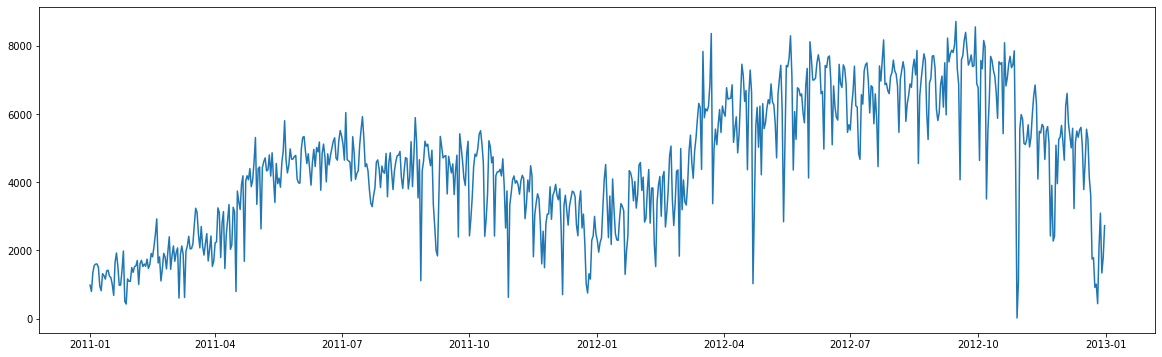

In [4]:
d_df.columns = ['ds', 'y']

fig = plt.figure(facecolor='w', figsize=(20, 6))
plt.plot(d_df.ds, d_df.y);

In [5]:
m = Prophet()
m.fit(d_df)

future = m.make_future_dataframe(periods=10)

forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(15)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
726,2012-12-27,3958.617349,2688.306892,5224.311557
727,2012-12-28,3997.882277,2792.478999,5238.708103
728,2012-12-29,3930.991396,2662.042689,5141.973163
729,2012-12-30,3649.205990,2357.375591,5007.056361
730,2012-12-31,3809.292692,2566.646326,5057.219449
731,2013-01-01,4037.983313,2814.959540,5281.526253
732,2013-01-02,4145.742605,2883.741059,5450.781212
733,2013-01-03,4341.673027,3141.004328,5593.906400
734,2013-01-04,4447.777523,3255.350046,5646.379655
735,2013-01-05,4439.567468,3132.802754,5651.036256


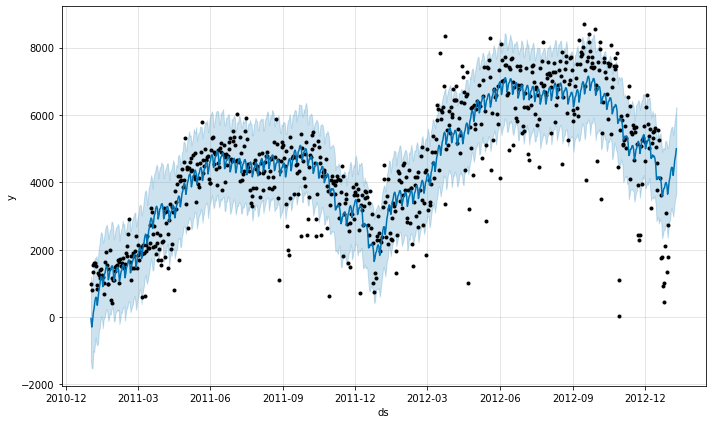

In [6]:
fig1 = m.plot(forecast)

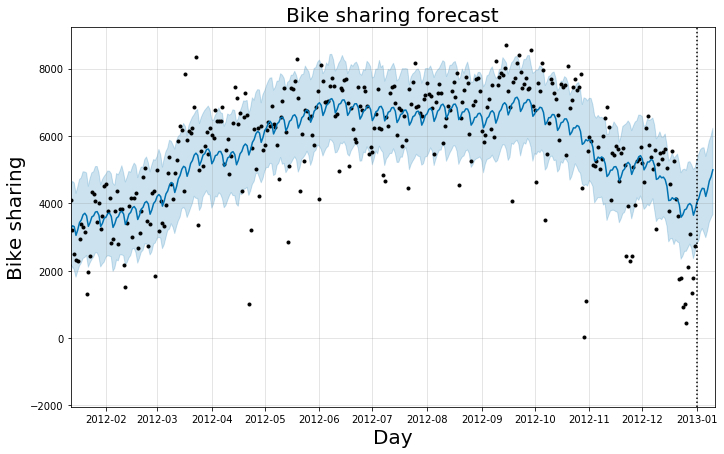

In [7]:
from datetime import datetime, timedelta

fig1 = m.plot(forecast)

#datenow = datetime.now()
datenow = datetime(2013, 1, 1)
dateend = datenow + timedelta(days=10)
datestart = dateend - timedelta(days=365)

plt.xlim([datestart, dateend])
plt.title("Bike sharing forecast", fontsize=20)
plt.xlabel("Day", fontsize=20)
plt.ylabel("Bike sharing", fontsize=20)
plt.axvline(datenow, color="k", linestyle=":")
plt.show()

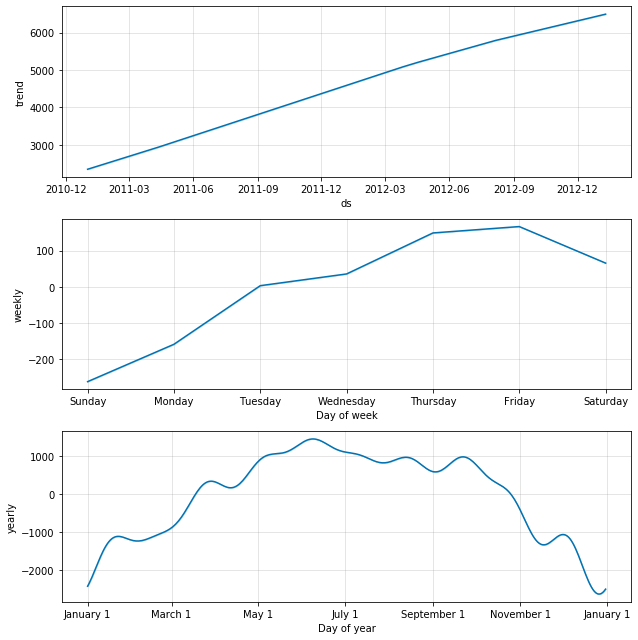

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m, horizon='30 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 23 forecasts with cutoffs between 2012-01-06 00:00:00 and 2012-12-01 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,3 days,1.964965e+06,1401.772101,1023.362557,0.267284,0.623188
1,4 days,1.773745e+06,1331.820248,974.967191,0.251136,0.608696
2,5 days,1.153898e+06,1074.196466,817.067891,0.163236,0.695652
3,6 days,1.034168e+06,1016.940588,761.483323,0.159420,0.739130
4,7 days,1.120006e+06,1058.303158,814.019182,0.181825,0.710145


Viz the percentage error (MAPE)

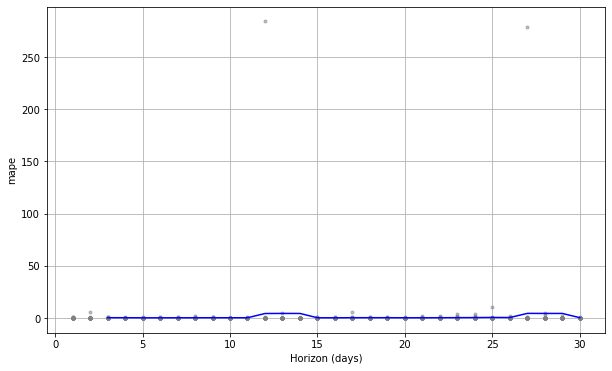

In [13]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv, metric='mape')

he model should be re-trained when new data becomes available. There is no point to re-train model, if data is not changed. Save model instead and use it again, when user wants to call predict function. Use pickle functionality for that:

```python
import pickle
with open('forecast_model.pckl', 'wb') as fout:
    pickle.dump(m, fout)
    
with open('forecast_model.pckl', 'rb') as fin:
    m2 = pickle.load(fin)
```